# Stock Market Prediction And Forecasting Using Stacked LSTM @ Let'sGrowMore



### In this project we are going to do univariate method of analysis. We'll use only the close parameter of the data to predict th
### next data. We are going to apply RNN recurrent neural network or LSTM (Long short term memory) which is very useful for
### for the time series analysis. We are going to find the pattern for the close price of the data

   ## 1. Importing the important libraries and loading the datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
stock_dataset = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
stock_dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


### 2. Exploring Datasets

In [4]:
stock_dataset.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [5]:
#Let's sort the value in the acesding order of the Date to get perfect insights of data
stock_dataset.sort_values(by=["Date"], inplace=True, ascending=True)
stock_dataset.Date.head()

2034    2010-07-21
2033    2010-07-22
2032    2010-07-23
2031    2010-07-26
2030    2010-07-27
Name: Date, dtype: object

We can see that there is no null data so we can go forward with preprocesssing

## 3.Visualising the dataset's property

Plotting the Open and Close price using according to date.

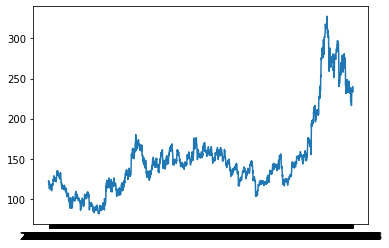

In [6]:
newdate = stock_dataset["Date"]
newdate
newopen = stock_dataset["Open"]
newdate
plt.plot(newdate,newopen)


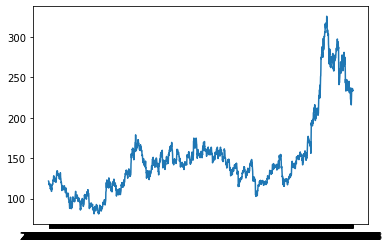

In [6]:
newdate = stock_dataset["Date"]
newdate
newclose = stock_dataset["Close"]
newdate
plt.plot(newdate,newclose)

## 4. Feature Scaling: Since big numbers increases the computational complexity. We are going to Normalize it from 0 to 1.

Note: It's always not a good choice to do Normalize data which don't have the fix upper or lower limit like in stock markt.
But we do here for learning


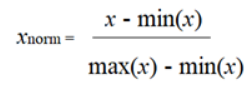

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))


#Because we are going to make prediction on th basis of closing price
close_price = stock_dataset["Close"]

close_price = np.array(close_price).reshape(-1 , 1)


transformed_closed_value =  scaler.fit_transform(close_price)

df = transformed_closed_value

df.shape

(2035, 1)

## 5. Splitting Datasets for training and testing

### we are going to use close value for the prediction. So, we will predict the future price using the close price of the data set.
### We are going to use the LSTM. It's a kind of neural network called RNN. RNN rebembers the past the data and use it for the giving output of the next data.

Let's use 60% of data for the trainin and remainin for the testing

In [7]:
training_data_length = int(0.6 * len(df))
testing_data_length  = int(len(df) - training_data_length)

In [8]:
training_data = df[:training_data_length]
testing_data  = df[training_data_length:]

In [9]:
print(f"size of training data is {len(training_data)} and testing data is {len(testing_data)} ")

1221+814


size of training data is 1221 and testing data is 814 


2035

#### For this LSTM we are using previous closing price as the input of the data and using n number of previous price 'X' we 
#### give out put to n + 1 closing price as the 'Y' of the data

In [10]:
def create_dataset(dataset , n_dataset_length):
    X =[]
    Y =[]
    for i in range(len(dataset) - n_dataset_length - 1):
        X.append(dataset[i:i + n_dataset_length , 0])
        Y.append(dataset[i + n_dataset_length , 0])
    return np.array(X) , np.array(Y)

In [11]:
n_dataset_length = 50

X_training , Y_training = create_dataset(training_data , n_dataset_length)
X_testing , Y_testing   = create_dataset(testing_data , n_dataset_length)

#### we can clearly see that 50 dataset is used for the prediction for the 51st dataset.

## 6. Creating stack LSTM model

In [12]:
print(X_training.shape) , print(X_testing.shape) , print(Y_training.shape) , print(Y_testing.shape)

(1170, 50)
(763, 50)
(1170,)
(763,)


(None, None, None, None)

In [89]:
#reshaping in the 3d 

X_training = X_training.reshape(X_training.shape[0] , X_training.shape[1] , 1)
X_testing  = X_testing.reshape(X_testing.shape[0] , X_testing.shape[1] , 1)

#### Reason for reshaping

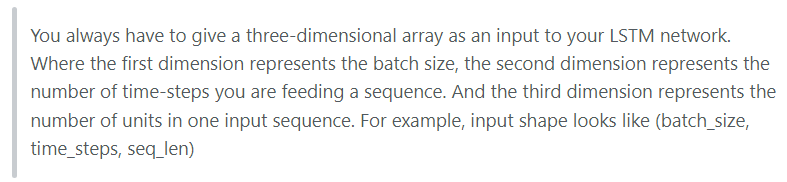


source : stackoverflow

### We use Sequential class of keras for making our stack LSTM model

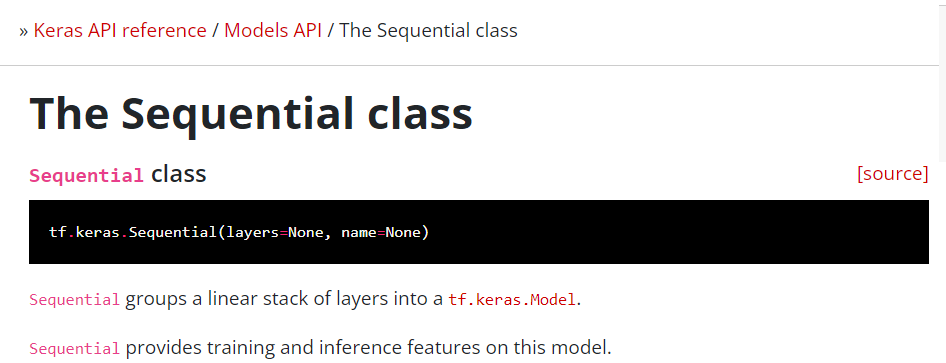



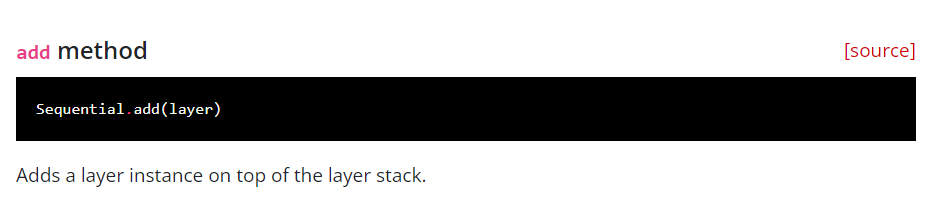

In [72]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

mdl = Sequential()

# Optionally, the first layer can receive an `input_shape` argument
mdl.add(LSTM(50, return_sequences=True, input_shape=(50, 1))) 

#inner layer
mdl.add(LSTM(50, return_sequences=True))
mdl.add(LSTM(50))

#output layer
mdl.add(Dense(1))

mdl.compile(loss='mean_squared_error', optimizer='adam')

In [15]:
mdl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [74]:
model = mdl.fit(X_training, Y_training, validation_data=(X_testing, Y_testing), epochs=100, batch_size=64, verbose=1);
%store model

Epoch 1/100
19/19 [==============================] - 20s 357ms/step - loss: 0.0097 - val_loss: 0.0166
Epoch 2/100
19/19 [==============================] - 4s 233ms/step - loss: 0.0018 - val_loss: 0.0036
Epoch 3/100
19/19 [==============================] - 4s 188ms/step - loss: 8.7220e-04 - val_loss: 0.0024
Epoch 4/100
19/19 [==============================] - 3s 161ms/step - loss: 8.3788e-04 - val_loss: 0.0038
Epoch 5/100
19/19 [==============================] - 3s 154ms/step - loss: 8.2411e-04 - val_loss: 0.0034
Epoch 6/100
19/19 [==============================] - 3s 155ms/step - loss: 8.3653e-04 - val_loss: 0.0030
Epoch 7/100
19/19 [==============================] - 3s 154ms/step - loss: 7.8884e-04 - val_loss: 0.0032
Epoch 8/100
19/19 [==============================] - 3s 150ms/step - loss: 7.6600e-04 - val_loss: 0.0026
Epoch 9/100
19/19 [==============================] - 3s 140ms/step - loss: 7.6822e-04 - val_loss: 0.0039
Epoch 10/100
19/19 [==============================] - 3s 141ms

INFO:tensorflow:Assets written to: ram://94fd409e-c585-4465-b291-ab1f5e3bda04/assets


INFO:tensorflow:Assets written to: ram://94fd409e-c585-4465-b291-ab1f5e3bda04/assets


Stored 'model' (History)


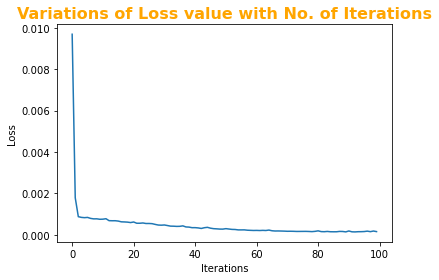

In [75]:
# Ploting Loss of our trained model

loss = mdl.history.history['loss']
plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Variations of Loss value with No. of Iterations", color="orange", fontsize=16, fontweight="bold");

In [76]:
mdl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [77]:
#generation of prediction for training and testing datasets

train_preds = scaler.inverse_transform(mdl.predict(X_training))

test_preds = scaler.inverse_transform(mdl.predict(X_testing))

24/24 [==============================] - 1s 39ms/step


In [20]:
train_preds.shape

(1170, 1)

# 7. Visualisations of comparisons and Projections

Text(0, 0.5, 'Closing Price')

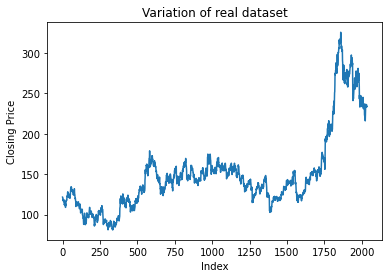

In [21]:
plt.plot(scaler.inverse_transform(df))
plt.title("Variation of real dataset")
plt.xlabel("Index")
plt.ylabel("Closing Price")

In [29]:
#shifting trained predictions for plotting
#putting actual and predicted in same curve
look_back = 50

#The empty_like() function is used to create a new array with the same shape and type as a given array.
trainPredictPlot = np.empty_like(df)

#nan (Empty value are assigned in the all place of trainPredictPlot)
trainPredictPlot[:,:] = np.nan


#Because predictoin started from 50th point onwards prediction (y) starts from 51th 
trainPredictPlot[look_back:len(train_preds)+look_back, :] = train_preds


#doing same for the testing data
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_preds)+(look_back*2)+1:len(df)-1, :] = test_preds

## Varation of actual dataset with predicted dataset

### Since we have used data of 50th day to predict the output of 51st day. logic of that is written below

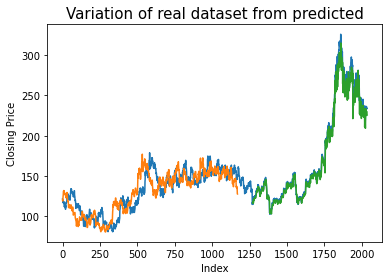

In [28]:




plt.plot(scaler.inverse_transform(df))
plt.plot(train_preds)
plt.title("Variation of real dataset from predicted",fontsize = "15")
plt.xlabel("Index")
plt.ylabel("Closing Price")
plt.plot(testPredictPlot)
plt.show()

# 8. Forecasting future data

In [31]:
len(X_training) , len(X_testing)

(1170, 763)

### For forecasting what we do is we take the data of the last 50 days and the forecast for the next 51st day.
### Again we shift by 1 and take those 2-51 i,e 50 data for the forecasting of 52nd day. 
### We repeat same for predicting next 28 days

In [104]:
preds_input = testing_data[764:]
preds_input.shape

(50, 1)

In [105]:
preds_input = preds_input.reshape(1, -1)

In [112]:
temp_input = list(preds_input)
len(temp_input)

1

In [107]:
temp_input = temp_input[0].tolist()

In [108]:
len(temp_input)

50

In [139]:

Thirty_days_output=[]
i=0

while(i<30):
    if(len(temp_input)>50):
        temp_input = temp_input[1:]
        preds_input=np.array(temp_input)
        preds_input=preds_input.reshape(1,-1)
    


    preds_input = preds_input.reshape(1, n_dataset_length,1)
    day_output = mdl.predict(preds_input, verbose=0)
    temp_input.extend(day_output[0].tolist()) # Put in inpu i,e original
    Thirty_days_output.extend(day_output.tolist()) #Put in 30 days array

    #print(f"Day-{i+1} input:\n\n{preds_input}\n\n")
    #print(f"Day-{i+1} output:\n\n{day_output}\n\n")
    i=i+1

In [115]:
Thirty_days_output

[[0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379],
 [0.5955338478088379]]

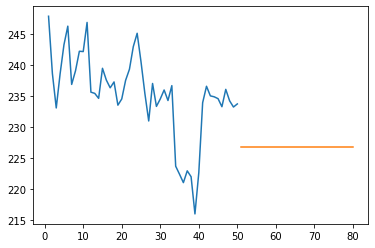

In [135]:

new_50_days = np.arange(1,51)
predicted_30_days = np.arange(51,81)

new_50_days_output = df[1985:]
plt.plot(new_50_days, scaler.inverse_transform(new_50_days_output))
plt.plot(predicted_30_days, scaler.inverse_transform(Thirty_days_output));

In [137]:
new_50_days_output_list = new_50_days_output.tolist()
new_50_days_output_list.extend(Thirty_days_output)

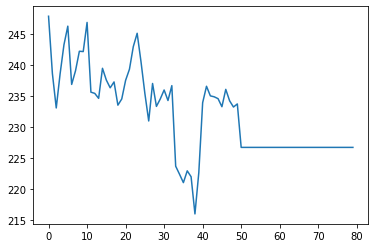

In [138]:
plt.plot(scaler.inverse_transform(Latest_100_days_output_list));

# Above is the prediction made by the model